Optimal Hybrid Chromosome: [1, 120, 3, 38, 88]
Final Polynomial Fitness Score: 635.0


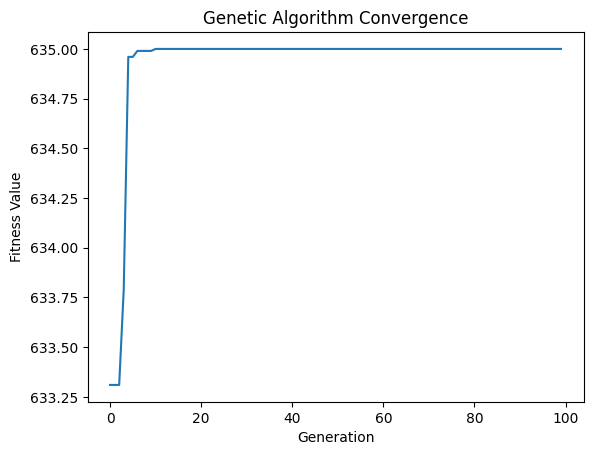

In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt

# --- Genetic Algorithm Parameters ---
POPULATION_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.1
ELITE_SIZE = 5

# --- Hybrid Chromosome Metadata ---
# Defines the structure: (type, range_or_categories)
# Types: 'binary', 'integer', 'discrete', 'categorical'
GENE_METADATA = [
    {'type': 'binary', 'range': (0, 1)},
    {'type': 'integer', 'range': (0, 1000)},
    {'type': 'categorical', 'categories': \
        ['Type_A', 'Type_B', 'Type_C', 'Type_D', 'Type_E']}, \
        # Encoded as 0, 1, 2, 3, 4
    {'type': 'discrete', 'range': (1, 100)},
    {'type': 'integer', 'range': (10, 500)}
]

CHROMOSOME_LENGTH = len(GENE_METADATA)

# --- Core Functions ---
def fitness_function(chromosome):
    """
    Polynomial Fitness Function: f(x) = -0.01x^2 + 5x + 10
    Note that 'x' is the total numerical value of the chromosome.
    """
    # Decoding: Summing the numeric values of the hybrid genes to create 'x'
    x = sum(chromosome)
    return -0.01 * x**2 + 5 * x + 10

def initialize_population():
    population = []
    for _ in range(POPULATION_SIZE):
        chromosome = []
        for meta in GENE_METADATA:
            if meta['type'] == 'binary':
                chromosome.append(random.randint(0, 1))
            elif meta['type'] in ['integer', 'discrete']:
                chromosome.append(random.randint(meta['range'][0], meta['range'][1]))
            elif meta['type'] == 'categorical':
                chromosome.append(random.randint(0, len(meta['categories']) - 1))
        population.append(chromosome)
    return population

def clamp_gene(value, index):
    """Ensures integer/discrete genes stay within bounds using clipping."""
    meta = GENE_METADATA[index]
    if meta['type'] in ['integer', 'discrete']:
        return int(np.clip(value, meta['range'][0], meta['range'][1]))
    return value

def hybrid_mutation(chromosome):
    """Applies type-specific mutation strategies."""
    mutated = chromosome[:]
    for i in range(len(mutated)):
        if random.random() < MUTATION_RATE:
            meta = GENE_METADATA[i]
            if meta['type'] == 'binary':
                mutated[i] = 1 - mutated[i] # Bit-flip [8]
            elif meta['type'] in ['integer', 'discrete']:
                # Random perturbation for integers [9]
                perturbation = random.choice([-2, -1, 1, 2])
                mutated[i] = clamp_gene(mutated[i] + perturbation, i)
            elif meta['type'] == 'categorical':
                # Randomly switch to a different category index [7]
                mutated[i] = random.randint(0, len(meta['categories']) - 1)
    return mutated

def two_point_crossover(parent1, parent2):
    """Swaps segments regardless of underlying data type [10]."""
    cp1 = random.randint(0, CHROMOSOME_LENGTH - 2)
    cp2 = random.randint(cp1 + 1, CHROMOSOME_LENGTH - 1)
    child1 = parent1[:cp1] + parent2[cp1:cp2] + parent1[cp2:]
    child2 = parent2[:cp1] + parent1[cp1:cp2] + parent2[cp2:]
    return child1, child2

def elite_selection(population, fitness_values):
    """Preserves best performers for the next generation [8]."""
    pop_with_fit = list(zip(population, fitness_values))
    # Sort by the fitness value, which is at index 1 of the (chromosome, fitness) tuple
    pop_with_fit.sort(key=lambda x: x[1], reverse=True)
    return [chrom for chrom, _ in pop_with_fit[:ELITE_SIZE]]

# --- Main Execution ---
def run_hybrid_ga():
    population = initialize_population()
    best_fitness_history = []

    for generation in range(GENERATIONS):
        fitness_values = [fitness_function(chrom) for chrom in population]
        best_fitness_history.append(max(fitness_values))

        # Preserve Elites
        new_population = elite_selection(population, fitness_values)

        while len(new_population) < POPULATION_SIZE:
            parent1 = random.choice(population)
            parent2 = random.choice(population)

            # Crossover and Mutation
            child1, child2 = two_point_crossover(parent1, parent2)
            new_population.append(hybrid_mutation(child1))
            if len(new_population) < POPULATION_SIZE:
                new_population.append(hybrid_mutation(child2))

        population = new_population

    best_idx = np.argmax([fitness_function(c) for c in population])
    return population[best_idx], max(fitness_values), best_fitness_history

# --- Run and Output ---
best_chrom, best_score, history = run_hybrid_ga()

print(f"Optimal Hybrid Chromosome: {best_chrom}")
print(f"Final Polynomial Fitness Score: {best_score}")

plt.plot(history)
plt.title("Genetic Algorithm Convergence")
plt.xlabel("Generation")
plt.ylabel("Fitness Value")
plt.show()